<a href="https://colab.research.google.com/github/Chygos/UniTartu_Intro_to_DS_Project/blob/main/Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Questions
- What is the distribution of hourly consumption?
- How does electricity consumption and price vary in the hours of the year?
- What's the average hourly consumption rate for the household and the price set for that hour?
- What time of the day is electricity consumption the highest or least
- Does consumption depend on the atmospheric temperature at that hour?


In this notebook, we will be carrying data exploration and visualisation to further understand our data. Firstly, we will import the data analytical and visualisation packages, and then load our train and test datasets.

### Importing Packages and Dataset

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
# changing to working directory
import os

os.chdir('gdrive/My Drive/IntroDS_unitartu')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
# import train and test sets
train = pd.read_csv('data/train_cleaned.csv')
test = pd.read_csv('data/test_cleaned.csv')

In [5]:
train.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,consumption,hour,weekday,month,week
0,2021-09-01 00:00:00+03:00,284.2,283.3,94.0,0.0,0.0,320.0,7.2,16.7,1012.6,2.0,0.09016,0.577,0,3,9,35
1,2021-09-01 01:00:00+03:00,283.7,282.6,93.0,0.0,0.0,320.0,7.2,13.0,1012.6,2.0,0.09251,0.594,1,3,9,35
2,2021-09-01 02:00:00+03:00,282.9,282.0,94.0,0.0,0.0,320.0,7.2,13.0,1012.2,2.0,0.08890,0.685,2,3,9,35
3,2021-09-01 03:00:00+03:00,283.0,281.4,90.0,0.0,0.0,330.0,7.2,13.0,1011.9,1.0,0.08735,1.016,3,3,9,35
4,2021-09-01 04:00:00+03:00,282.0,281.1,94.0,0.0,0.0,300.0,3.6,13.0,1011.4,2.0,0.08688,0.677,4,3,9,35


In [6]:
test.head()

,time,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,coco,el_price,hour,weekday,month,week
0,2022-08-25 00:00:00+03:00,294.1,288.2,69.0,0.0,0.0,340.0,9.0,9.3,1022.0,2.0,0.25533,0,4,8,34
1,2022-08-25 01:00:00+03:00,293.1,288.1,73.0,0.0,0.0,30.0,6.0,14.8,1022.0,2.0,0.19492,1,4,8,34
2,2022-08-25 02:00:00+03:00,293.1,288.1,73.0,0.0,0.0,320.0,7.0,13.0,1022.0,2.0,0.18853,2,4,8,34
3,2022-08-25 03:00:00+03:00,291.7,290.0,90.0,0.0,0.0,0.0,4.0,11.1,1022.4,4.0,0.19947,3,4,8,34
4,2022-08-25 04:00:00+03:00,291.1,290.1,94.0,0.0,0.0,280.0,7.0,11.1,1022.0,3.0,0.21192,4,4,8,34


In [7]:
train.dtypes

time            object
temp           float64
dwpt           float64
rhum           float64
prcp           float64
snow           float64
wdir           float64
wspd           float64
wpgt           float64
pres           float64
coco           float64
el_price       float64
consumption    float64
hour             int64
weekday          int64
month            int64
week             int64
dtype: object

In [8]:
# converting time to date type
train = train.assign(time = pd.to_datetime(train['time'], utc=True).dt.tz_convert('Etc/GMT-3'))
test = test.assign(time = pd.to_datetime(test['time'], utc=True).dt.tz_convert('Etc/GMT-3'))

In [9]:
train = train.assign(bill_cost = train.consumption * train.el_price) # bill cost

## __Data Visualisation__

### __Data Exploration__

Here we will do summary statistics of some of the variables

- Summary statistics of the hourly consumption
- Summary statistics of our variables

In [10]:
train.describe().T.iloc[:-5, 1:]

,mean,std,min,25%,50%,75%,max
temp,279.744204,9.257806,246.90000,273.40000,279.20000,286.225000,304.400
dwpt,275.486767,8.184391,244.30000,270.10000,274.90000,282.000000,293.900
rhum,77.013617,17.520566,20.00000,66.00000,83.00000,91.000000,100.000
prcp,0.014234,0.194311,0.00000,0.00000,0.00000,0.000000,7.900
snow,1.084730,11.769773,0.00000,0.00000,0.00000,0.000000,220.000
wdir,201.564246,87.792064,0.00000,150.00000,210.00000,270.000000,360.000
wspd,9.156355,4.826976,0.00000,7.20000,7.20000,10.800000,31.700
wpgt,20.869681,9.956558,2.90000,13.00000,18.50000,27.800000,63.000
pres,1013.229423,12.592944,962.60000,1006.50000,1014.70000,1020.700000,1047.500
coco,4.768273,4.980460,-1.00000,2.00000,3.00000,5.000000,25.000


In [11]:
train.bill_cost.describe()

count    8592.000000
mean        0.151905
std         0.193557
min         0.000000
25%         0.048016
50%         0.090690
75%         0.177746
max         3.089687
Name: bill_cost, dtype: float64

In [12]:
print(f'Total Electricity Bill Cost is: Euro {(train.consumption * train.el_price).sum():,.2f}')
print(f'Average Electricity Bill Cost per hour is: Euro {(train.bill_cost).mean():,.2f}')

Total Electricity Bill Cost is: Euro 1,305.17
Average Electricity Bill Cost per hour is: Euro 0.15


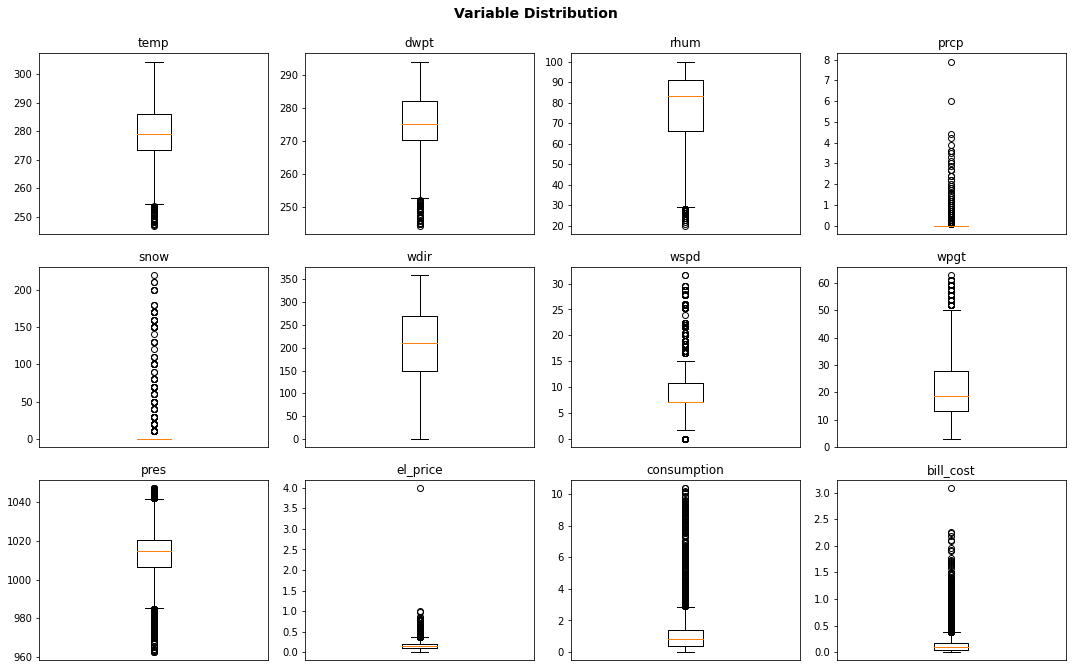

In [13]:
# Variable Distributions

plt.figure(figsize=(15,9))
plt.suptitle('Variable Distribution', y=1.03, weight='bold', fontsize=14)
for i, col in enumerate(train.select_dtypes(np.number).columns.drop(
    ['coco', 'week', 'month', 'weekday', 'hour'])):
  plt.subplot(3,4,i+1)
  plt.boxplot(train[col])
  plt.title(col)
  plt.xticks([])
plt.tight_layout()
plt.show()

# __Research Questions__

### __Consumption Distribution__

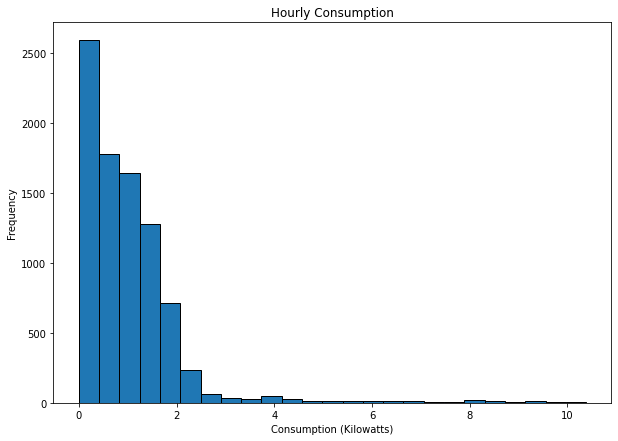

In [14]:
train.consumption.plot.hist(title='Hourly Consumption', edgecolor='black', bins=25, figsize=(10,7))

plt.xlabel('Consumption (Kilowatts)')
plt.show()

The consumption rate for this household ranges from 0 to slightly above 10. The distribution is highly right-skewed with consumption rates less than 1 most hours of the day.

### __Hourly Consumption rate over time__

In this section, we will look at the household's consumption per hour. Firstly, we will look at the average hourly consumption rates over a long period smoothened over a 7-Day average.

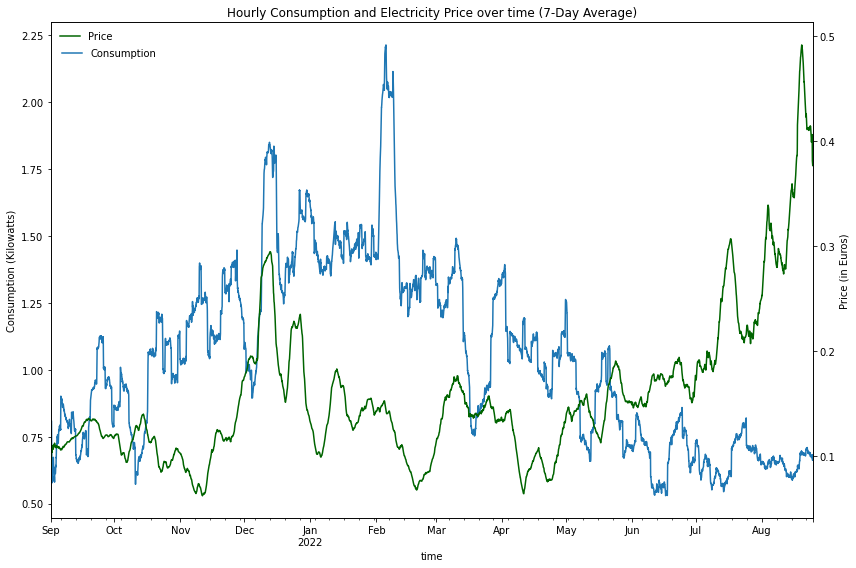

In [15]:
# Daily Consumption
plt.figure(figsize=(12,8))
ax = train.resample('h', on='time').consumption.sum().rolling('7D').mean().plot()
ax1 = train.resample('1h', on='time').el_price.mean().rolling('7D').mean().plot(secondary_y=True, ax=ax, color='darkgreen')

plt.title('Hourly Consumption and Electricity Price over time (7-Day Average)')
ax.set_ylabel('Consumption (Kilowatts)')
ax1.set_ylabel('Price (in Euros)')
ax1.legend(labels=['Price'], frameon=False)
ax.legend(labels=['Consumption'], loc=(0.01,0.92),frameon=False)
plt.tight_layout()
plt.show()

The following figure shows the hourly consumption and electricity price over time smoothened by a 7-day average. From the above figure, we see

- The presence of peaks in the hourly consumption. There are hours of the day where electricity consumption are high and least.
- We can also see that electricity consumption increases mostly during Fall and Winter seasons (highest from December to February). This quite makes sense since this time of the year is characterised by very cold weather conditions. Homes at this time of the year use more electrical heating appliances such as electric heaters to heat up their houses, take hot showers and baths, and also take hot teas. 
- Similarly, the electricity cost at the end of the year peaks the highest.
- A striking thing to note here is that from the month of May 2022, electricity consumption has moved in an upward trend peaking at almost 50 cents per hour.
- Conversely, as the electrcity cost increased since the month of May, the consumption of this household has also moved downward to less than about 1kW on average.
- The increase in electricity cost resulted from the Russian-Ukrainian war which started in February 2022 and since Russia is a largest supplier of natural gas to European countries. This high cost in electricity bills has resulted in this household decreasing their electricity consumption.

Now we will look at how the monthly consumption has varied so far by looking at the monthly consumption from September 2021 to August 2022.

### __Monthly Consumption__

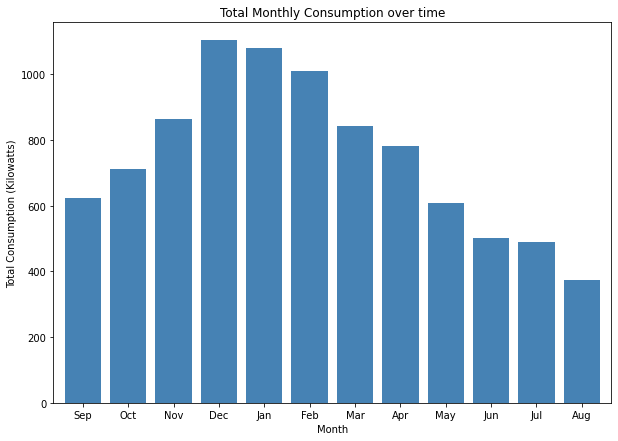

In [16]:
months = pd.Series(train.resample('M', on='time').consumption.sum().index.month_name()).apply(lambda x: x[:3])

train.resample('M', on='time').consumption.sum().plot.bar(rot=0, figsize=(10,7), width=0.8, color='steelblue')
plt.xticks(range(12), months)
plt.xlabel('Month')
plt.ylabel('Total Consumption (Kilowatts)')
plt.title('Total Monthly Consumption over time');

The above figure shows the total electricity consumption for this household. We see that
- This household's consumption was highest in December 2021.
- Its consumption increased from September 2021 to December and decreaed slightly in January and February 2022, and has continued to drop to less than 400 KW in August.
- From the price trend, we see that at this time, electricity cost skyrocketed and this has affected consumption in order to cut costs.

We will look at the average hourly consumption and the average electricity cost at each hour of the day

### __Hourly Consumption and Price set__


In [17]:
# Average hourly consumption vs Price
av_hourly_consumption_price = train.groupby('hour').agg({'consumption':'mean', 'el_price':'mean'})

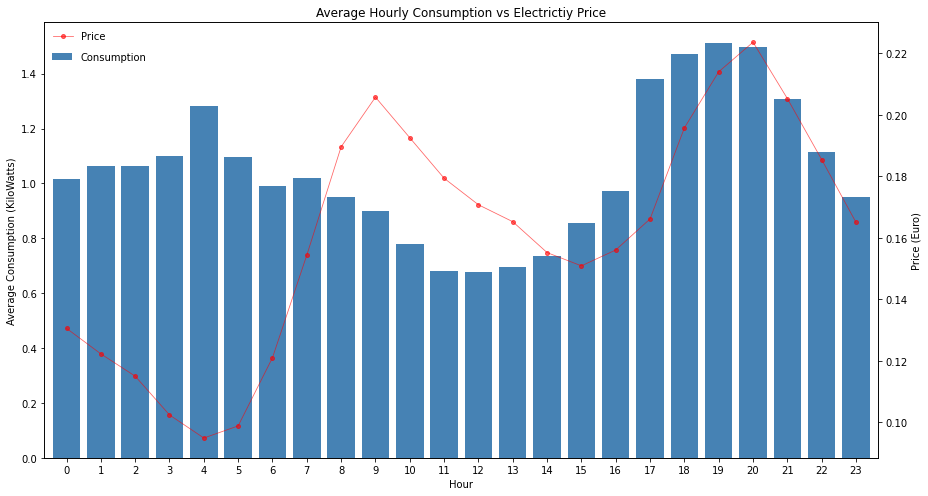

In [18]:
fig, ax = plt.subplots(figsize=(13,7))
ax1=av_hourly_consumption_price.plot.bar(y='consumption', rot=0, color='steelblue', 
                                         width=0.8, ax=ax, label='Consumption')

ax2=av_hourly_consumption_price.plot(y='el_price', rot=0, secondary_y=True, ax=ax1, 
                                     lw=0.8, color='red', alpha=0.6,marker='o', 
                                     markersize=4, label='Price')

plt.title('Average Hourly Consumption vs Electrictiy Price')
ax1.set(xlabel='Hour')
ax1.set_ylabel('Average Consumption (KiloWatts)')
ax2.set_ylabel('Price (Euro)')
ax2.legend(labels=['Price'], frameon=False, loc='upper left')
ax1.legend(labels=['Consumption'], loc=(0.005,0.9),frameon=False)
plt.tight_layout()
plt.show()

From this figure,
- Hourly consumption remains relatively the same from midnight to about 5am. It begns to decline tioo about 1pm before rising and peaking at 7pm and then a second decline from 8-11pm.
- For this household, electricity consumption is the highest between 5-8pm, with average consumption of 1.4 kilowatts and declines from 9-11pm. 
- Consumption is relatively the stable from midnight to 7am before dwindling to less than 0.8 kilowatts from 10am to 2pm.
- On the other hand, at the time when consumption is the highest for this household (5-8pm), electricity cost is the highest at this time between 16-24 cents on average. This household may need to reduce consumption at this time of the day to reduce bill costs.
- Between 3am and 5am, the hourly electricity price is the cheapest (less than 12 cents). Probably, at these hours, the household may reduce electricity cost by using this time to use devices that consume a lot of energy since they will be paying less in bill costs unlike when they use them at hours when electricity price is high.
- Also, electricity price peaks at two times in the day: from 4-9am and 3-8pm

### __Total Bills Cost Paid__

- What is the total bills paid by this household per month?
- What is the average hourly bill cost?

To answer this, we will visualise the monthly amount paid in bill costs and also the average electricity bill cost they pay per hour

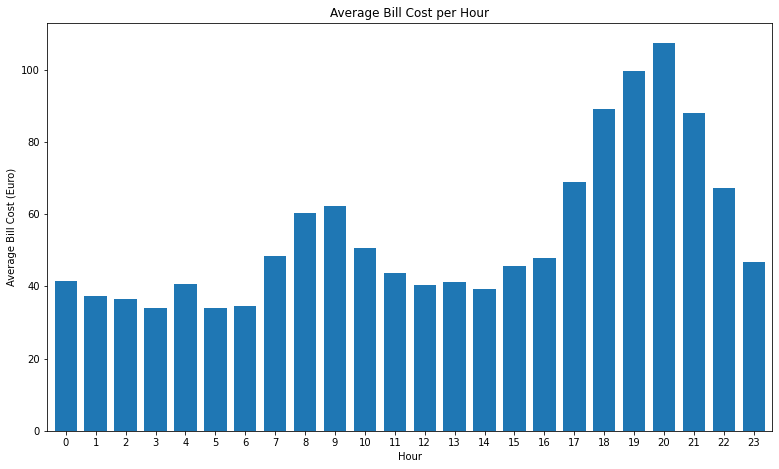

In [24]:
# Amount paid in bill per hour
hour_bill_cost = train.groupby(['hour']).bill_cost.sum()
hour_bill_cost.plot.bar(figsize=(13,7.5), rot=0, width=0.75)
plt.ylabel('Total Bill Cost (Euro)')
plt.xlabel('Hour')
plt.title('Total Bill Cost by Hour')
plt.show()

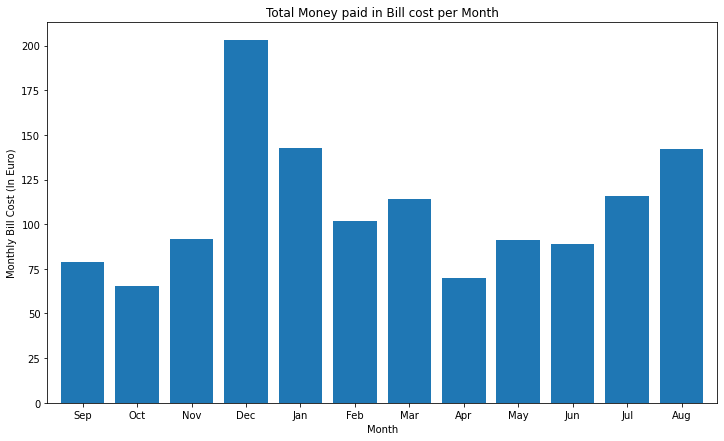

In [20]:
train.resample('M', on='time').bill_cost.sum().plot.bar(figsize=(12,7), width=0.8, rot=0)
plt.xticks(range(12), months)
plt.xlabel('Month')
plt.ylabel('Monthly Bill Cost (In Euro)')
plt.title('Total Money paid in Bill cost per Month')
plt.show()

- From the top figure, we see that more money is paid in electricity bills at times when consumption and electricity price are highest. Over 100 Euros have been paid in bill costs between 6pm to 9pm. This high cost results from when households are at home watching TVs, heating up the rooms during cold weathers, cooling the rooms during hot weather, preparing food for dinner or using the laundry machine.
- The amount of hourly bills is the least between 12 midnight and 5am and between 12 noon and 2pm. Less than 45 euros was paid in bills in these hours. These times of the day are usually times when the households are either sleeping or not at home (for work, school etc).

- On the other hand, looking at the total monthly bill costs, we see that over 200 euros was paid in electricity cost for this household in December of 2021 but from April to August 2022, the electricity bill costs have increased drastically. From the hourly consumption and price over time, we noticed that since the Russian-Ukranian war, electricity prices have increased and this resulted in the high cost despite this household's efforts in reducing consumption. 

### __Relationship between Electricity consumption and temperature__

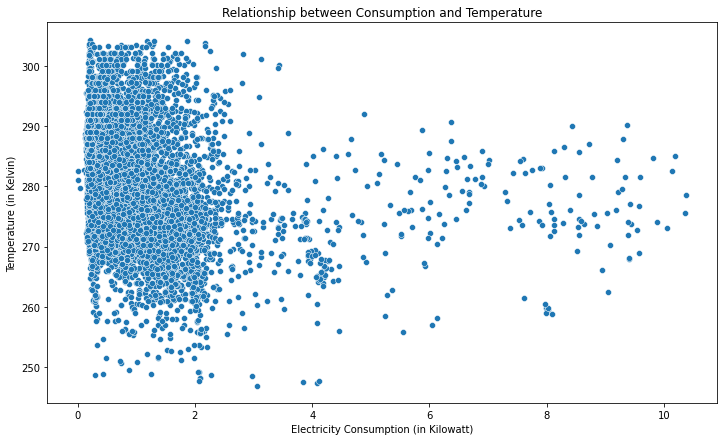

In [21]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=train, y='temp', x='consumption')
plt.title('Relationship between Consumption and Temperature')
plt.ylabel('Temperature (in Kelvin)')
plt.xlabel('Electricity Consumption (in Kilowatt)');

At higher temperatures, the hourly consumption seems independent of the temperature at that hour (hourly consumptions seem to be clustered between 0 and 2 Kilowatts), but at lower temperatures, we see an increase in electricity consumption (increase from 2kw to up to 10kw per hour) 

### __Correlation Matrix__

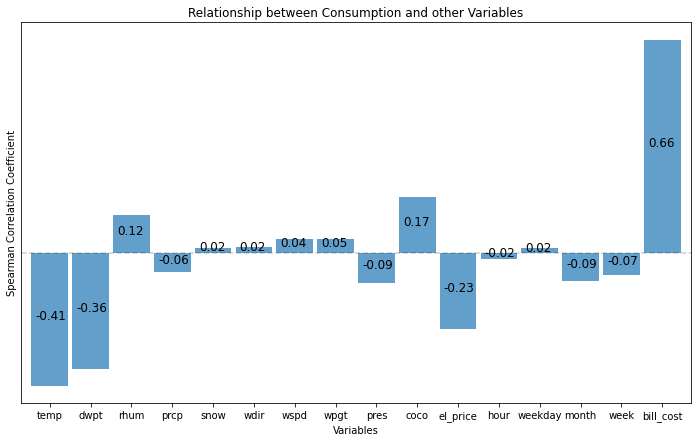

In [22]:
# Relationship with other variables
plt.figure(figsize=(12,7))
ax = train.corr(method='spearman')['consumption'].drop('consumption').plot.bar(rot=0, width=0.9, alpha=0.7)
plt.axhline(0, ls='--', color='black', alpha=0.2)
plt.yticks([])
plt.ylabel('Spearman Correlation Coefficient')
plt.xlabel('Variables')
plt.title('Relationship between Consumption and other Variables')

for i in ax.patches:
  val = '{:.2f}'.format(i.get_height())
  x = i.get_x() + i.get_width()/2 - 0.35
  y = i.get_y() + i.get_height()/2
  ax.annotate(val, (x, y),rotation=0, size = 12)
plt.show()

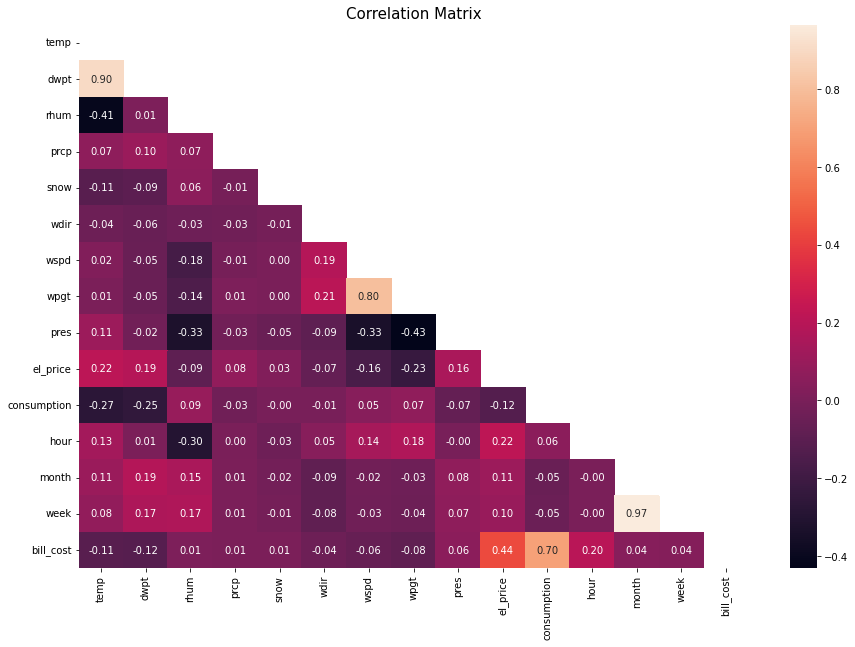

In [23]:
# correlation matrix between all variables
corr = train.drop(['coco','weekday'], axis=1).corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr, mask=np.triu(corr), annot=True, fmt='.2f')
plt.title('Correlation Matrix', fontsize=15)
plt.show()

Feature Engineering Ideas

- [Create wind direction class](https://en.wikipedia.org/wiki/Wind_direction): N wind -> 0-90, E wind -> 90-180, S wind -> 180-270, W wind -> 270-360
- Regroup the coco class into two: ordinal variable indicating the intensity of weather condition, and a nominal variable indicating the type of weather condition or not use them at all.